### Скачивание нужных модулей

In [2]:
!python3 -m pip install statsmodels pandas numpy matplotlib sklearn scikit-learn

### Импорт модулей

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from statsmodels.stats.diagnostic import het_white
from statsmodels.tools import add_constant
from sklearn.model_selection import train_test_split

### Получение данных

In [5]:
data = pd.read_csv("data_train.csv")
display(data.columns)
display(data)

Index(['id', 'Год. квартал', 'X1(Экспорт в страны вне СНГ млрд. долл.)',
       'X2(Импорт из стран вне СНГ млрд. долл.)',
       'X3(Индекс реальных инвестиций в основной капитал)',
       'X4(Норма безработицы %)', 'X5(Цена за Brent USD)',
       'Y(Индекс реальной зарплаты)'],
      dtype='object')

,id,Год. квартал,X1(Экспорт в страны вне СНГ млрд. долл.),X2(Импорт из стран вне СНГ млрд. долл.),X3(Индекс реальных инвестиций в основной капитал),X4(Норма безработицы %),X5(Цена за Brent USD),Y(Индекс реальной зарплаты)
0,1,2010 I,78.1,38.842,83.9,8.6,76.595000,205.99
1,2,II,81.5,49.584,130.5,7.6,79.335000,216.91
2,3,III,80.5,58.500,152.2,6.7,76.195000,216.26
3,4,IV,93.5,66.300,225.7,6.7,79.691667,236.37
4,5,2011 I,93.1,55.100,87.4,7.4,91.140000,207.30
5,6,II,114.3,70.700,140.6,6.6,114.476667,220.98
6,7,III,109.3,71.400,169.6,6.1,113.890000,222.75
7,8,IV,120.1,76.700,259.5,6.1,108.415000,254.60
8,9,2012 I,111.0,61.900,99.4,6.3,109.873333,227.87
9,10,II,110.9,70.400,155.3,5.5,121.401667,244.27


In [7]:
fixed_data = data[['X1(Экспорт в страны вне СНГ млрд. долл.)',
       'X2(Импорт из стран вне СНГ млрд. долл.)',
       'X3(Индекс реальных инвестиций в основной капитал)',
       'X4(Норма безработицы %)', 'X5(Цена за Brent USD)', 'Y(Индекс реальной зарплаты)']]

In [8]:
fixed_data.corr()

,X1(Экспорт в страны вне СНГ млрд. долл.),X2(Импорт из стран вне СНГ млрд. долл.),X3(Индекс реальных инвестиций в основной капитал),X4(Норма безработицы %),X5(Цена за Brent USD),Y(Индекс реальной зарплаты)
X1(Экспорт в страны вне СНГ млрд. долл.),1.000000,0.722953,0.333825,-0.126841,0.808948,0.260017
X2(Импорт из стран вне СНГ млрд. долл.),0.722953,1.000000,0.418509,-0.194490,0.422090,0.475555
X3(Индекс реальных инвестиций в основной капитал),0.333825,0.418509,1.000000,-0.266094,0.102294,0.449307
X4(Норма безработицы %),-0.126841,-0.194490,-0.266094,1.000000,0.102743,-0.598311
X5(Цена за Brent USD),0.808948,0.422090,0.102294,0.102743,1.000000,-0.265638
Y(Индекс реальной зарплаты),0.260017,0.475555,0.449307,-0.598311,-0.265638,1.000000


In [9]:
X = fixed_data.drop('Y(Индекс реальной зарплаты)', axis=1)
X = add_constant(X)
y = fixed_data['Y(Индекс реальной зарплаты)']

linearModel = sm.OLS(y, X)
fittedLinearModel = linearModel.fit()
display(fittedLinearModel.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Y(Индекс реальной зарплаты)   R-squared:                       0.833
Model:                                     OLS   Adj. R-squared:                  0.812
Method:                          Least Squares   F-statistic:                     40.81
Date:                         Thu, 24 Aug 2023   Prob (F-statistic):           7.10e-15
Time:                                 13:05:28   Log-Likelihood:                -181.83
No. Observations:                           47   AIC:                             375.7
Df Residuals:                               41   BIC:                             386.8
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                               238.1029     19.324     12.321      0.000     199.077     277.129
X1(Экспорт в страны вне СНГ млрд. долл.)              1.5835      0.266      5.944      0.000       1.045       2.121
X2(Импорт из стран вне СНГ млрд. долл.)               0.2217      0.176      1.262      0.214      -0.133       0.576
X3(Индекс реальных инвестиций в основной капитал)     0.0478      0.035      1.357      0.182      -0.023       0.119
X4(Норма безработицы %)                             -10.4632      2.329     -4.492      0.000     -15.167      -5.759
X5(Цена за Brent USD)                                -1.1998      0.141     -8.522      0.000      -1.484      -0.915
==============================================================================
Omnibus:                        0.203   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.904   Jarque-Bera (JB):                0.402
Skew:                           0.070   Prob(JB):                        0.818
Kurtosis:                       2.569   Cond. No.                     2.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
het_test = het_white(fittedLinearModel.resid, fittedLinearModel.model.exog)
# Labels from docs
# Href 
labels = [
    'The lagrange multiplier statistic', 
    'The p-value of lagrange multiplier test', 
    'The f-statistic of the hypothesis that the error variance does not depend on x. This is an alternative test variant not the original LM test',
    'The p-value for the f-statistic'
]
"""
Overview
--------
White’s Lagrange Multiplier Test for Heteroscedasticity.
--------------------------------------------------------
alpha - statistical significance
p - The p-value of lagrange multiplier test
--------------------------------------------------------
H0: p > alpha -> None heteroscedasticity
H1: otherwise -> heteroscedasticity exists
--------------------------------------------------------
"""
display(dict(zip(labels, het_test)))

{'The lagrange multiplier statistic': 32.20679784501996,
 'The p-value of lagrange multiplier test': 0.041144005751112184,
 'The f-statistic of the hypothesis that the error variance does not depend on x. This is an alternative test variant not the original LM test': 2.8302754711177323,
 'The p-value for the f-statistic': 0.006828175706120813}

### Создание линейной модели с использованием библиотеки "statsmodels"

In [10]:
X = fixed_data.drop('Y(Индекс реальной зарплаты)', axis=1)
X = add_constant(X)
y = fixed_data['Y(Индекс реальной зарплаты)']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

linearModel = sm.OLS(y_train, X_train)
fittedLinearModel = linearModel.fit()
display(fittedLinearModel.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Y(Индекс реальной зарплаты)   R-squared:                       0.842
Model:                                     OLS   Adj. R-squared:                  0.816
Method:                          Least Squares   F-statistic:                     32.96
Date:                         Thu, 24 Aug 2023   Prob (F-statistic):           1.59e-11
Time:                                 13:05:30   Log-Likelihood:                -141.32
No. Observations:                           37   AIC:                             294.6
Df Residuals:                               31   BIC:                             304.3
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                               232.0765     22.311     10.402      0.000     186.574     277.579
X1(Экспорт в страны вне СНГ млрд. долл.)              1.6167      0.290      5.573      0.000       1.025       2.208
X2(Импорт из стран вне СНГ млрд. долл.)               0.2428      0.187      1.299      0.204      -0.138       0.624
X3(Индекс реальных инвестиций в основной капитал)     0.0605      0.037      1.651      0.109      -0.014       0.135
X4(Норма безработицы %)                             -11.0879      2.835     -3.911      0.000     -16.870      -5.306
X5(Цена за Brent USD)                                -1.1550      0.147     -7.870      0.000      -1.454      -0.856
==============================================================================
Omnibus:                        1.645   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                0.751
Skew:                          -0.279   Prob(JB):                        0.687
Kurtosis:                       3.419   Cond. No.                     2.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### График предсказаний

MSE metric: 205.78578058602483
R2 metric: 0.7593169902955497


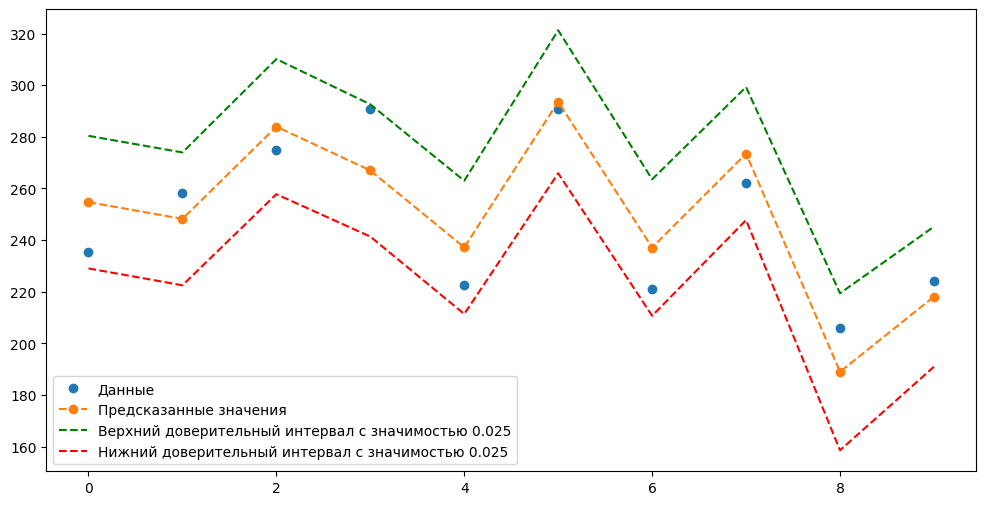

In [11]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

y_test.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

pred_ols = fittedLinearModel.get_prediction(X_test)
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]
predicted_mean = pred_ols.summary_frame()["mean"]

x = [i for i in range(y_test.size)]

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(y_test, "o", label="Данные")
ax.plot(x, predicted_mean, "o--", label="Предсказанные значения")
ax.plot(x, iv_u, "g--", label="Верхний доверительный интервал с значимостью 0.025")
ax.plot(x, iv_l, "r--", label="Нижний доверительный интервал с значимостью 0.025")
ax.legend(loc="best")

print("MSE metric:", mean_squared_error(y_test, predicted_mean))
print("R2 metric:", r2_score(y_test, predicted_mean))

### Проверка гетероскедостичности с помощью Теста Вайта"
<a href ="https://en.wikipedia.org/wiki/White_test#:~:text=In%20statistics%2C%20the%20White%20test,most%20cited%20articles%20in%20economics">White test ENG</a> <br>
<a href="https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D1%81%D1%82_%D0%A3%D0%B0%D0%B9%D1%82%D0%B0#:~:text=%D0%A2%D0%B5%D1%81%D1%82%20%D0%A3%D0%B0%D0%B9%D1%82%D0%B0%20(%D0%B0%D0%BD%D0%B3%D0%BB.%20White%20test),%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%B8%D1%82%D1%8C%20%D0%B3%D0%B5%D1%82%D0%B5%D1%80%D0%BE%D1%81%D0%BA%D0%B5%D0%B4%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%BE%D1%81%D1%82%D1%8C%20%D1%81%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D1%8B%D1%85%20%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA%20%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8"> White test RU </a>


In [12]:
het_test = het_white(fittedLinearModel.resid, fittedLinearModel.model.exog)
# Labels from docs
# Href 
labels = [
    'The lagrange multiplier statistic', 
    'The p-value of lagrange multiplier test', 
    'The f-statistic of the hypothesis that the error variance does not depend on x. This is an alternative test variant not the original LM test',
    'The p-value for the f-statistic'
]
"""
Overview
--------
White’s Lagrange Multiplier Test for Heteroscedasticity.
--------------------------------------------------------
alpha - statistical significance
p - The p-value of lagrange multiplier test
--------------------------------------------------------
H0: p > alpha -> None heteroscedasticity
H1: otherwise -> heteroscedasticity exists
--------------------------------------------------------
"""
display(dict(zip(labels, het_test)))

{'The lagrange multiplier statistic': 32.51634511705973,
 'The p-value of lagrange multiplier test': 0.0380976899655334,
 'The f-statistic of the hypothesis that the error variance does not depend on x. This is an alternative test variant not the original LM test': 5.801756997984876,
 'The p-value for the f-statistic': 0.00040806983529074976}

### Методы для устранения гетероскедостичности
1. Weighted least squares <a href="https://en.wikipedia.org/wiki/Weighted_least_squares">link eng</a> <a href="https://translated.turbopages.org/proxy_u/en-ru.ru.7be2f172-62645187-3e62ec93-74722d776562/https/en.wikipedia.org/wiki/Weighted_least_squares">link ru</a>
2. Change params(Removing insignificant parameters)

## Изменение параметров(Удаление не значимых параметров)

### Подготовка данных

In [13]:
new_fixed_data = fixed_data.drop(columns=[
    'X1(Экспорт в страны вне СНГ млрд. долл.)', 
    'X3(Индекс реальных инвестиций в основной капитал)'
])
display(new_fixed_data.corr())

,X2(Импорт из стран вне СНГ млрд. долл.),X4(Норма безработицы %),X5(Цена за Brent USD),Y(Индекс реальной зарплаты)
X2(Импорт из стран вне СНГ млрд. долл.),1.000000,-0.194490,0.422090,0.475555
X4(Норма безработицы %),-0.194490,1.000000,0.102743,-0.598311
X5(Цена за Brent USD),0.422090,0.102743,1.000000,-0.265638
Y(Индекс реальной зарплаты),0.475555,-0.598311,-0.265638,1.000000


### Построение обычной модели наименьших квадратов, без параметров X1, X3

In [14]:
X = new_fixed_data.drop('Y(Индекс реальной зарплаты)', axis=1)
X = add_constant(X)
y = new_fixed_data['Y(Индекс реальной зарплаты)']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

OLSModel = sm.OLS(y_train, X_train)
fittedOLSModel = OLSModel.fit()
display(fittedOLSModel.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Y(Индекс реальной зарплаты)   R-squared:                       0.643
Model:                                     OLS   Adj. R-squared:                  0.611
Method:                          Least Squares   F-statistic:                     19.82
Date:                         Thu, 24 Aug 2023   Prob (F-statistic):           1.58e-07
Time:                                 13:05:45   Log-Likelihood:                -156.46
No. Observations:                           37   AIC:                             320.9
Df Residuals:                               33   BIC:                             327.4
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                     315.3520     25.758     12.243      0.000     262.947     367.757
X2(Импорт из стран вне СНГ млрд. долл.)     0.9824      0.182      5.394      0.000       0.612       1.353
X4(Норма безработицы %)                   -13.8390      3.896     -3.552      0.001     -21.765      -5.913
X5(Цена за Brent USD)                      -0.5256      0.118     -4.439      0.000      -0.766      -0.285
==============================================================================
Omnibus:                        0.595   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.743   Jarque-Bera (JB):                0.713
Skew:                          -0.214   Prob(JB):                        0.700
Kurtosis:                       2.471   Cond. No.                         917.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Обычная линейная модель с изменёнными параметрами

MSE metric: 279.0509299039874
R2 metric: 0.42544834598436254


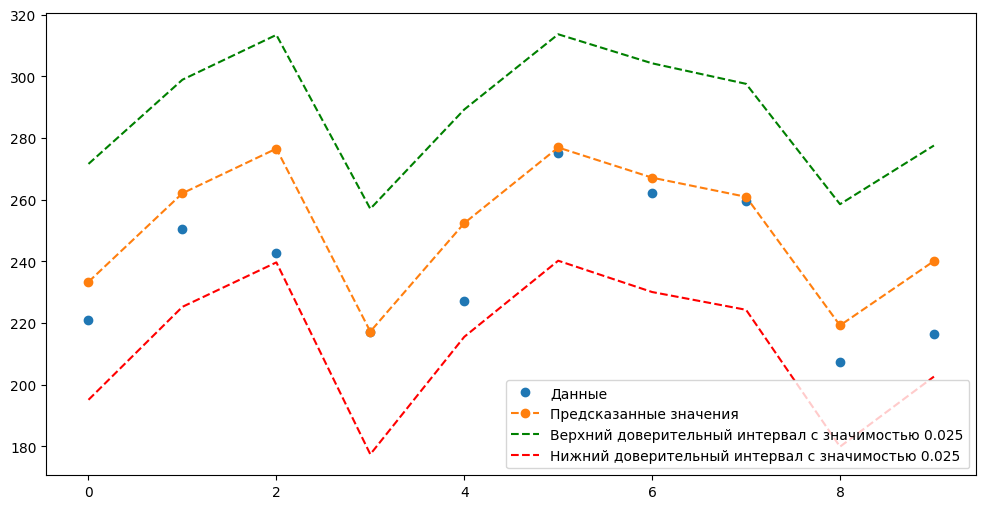

In [15]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

y_test.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

pred_ols = fittedOLSModel.get_prediction(X_test)
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]
predicted_mean = pred_ols.summary_frame()["mean"]

x = [i for i in range(y_test.size)]

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(y_test, "o", label="Данные")
ax.plot(x, predicted_mean, "o--", label="Предсказанные значения")
ax.plot(x, iv_u, "g--", label="Верхний доверительный интервал с значимостью 0.025")
ax.plot(x, iv_l, "r--", label="Нижний доверительный интервал с значимостью 0.025")
ax.legend(loc="best")

print("MSE metric:", mean_squared_error(y_test, predicted_mean))
print("R2 metric:", r2_score(y_test, predicted_mean))

### Check heteroscedasticity

In [17]:
het_test = het_white(fittedOLSModel.resid, fittedOLSModel.model.exog)
# Labels from docs
# Href 
labels = [
    'The lagrange multiplier statistic', 
    'The p-value of lagrange multiplier test', 
    'The f-statistic of the hypothesis that the error variance does not depend on x. This is an alternative test variant not the original LM test',
    'The p-value for the f-statistic'
]
"""
Overview
--------
White’s Lagrange Multiplier Test for Heteroscedasticity.
--------------------------------------------------------
alpha - statistical significance
p - The p-value of lagrange multiplier test
--------------------------------------------------------
H0: p > alpha -> None heteroscedasticity
H1: otherwise -> heteroscedasticity exists
--------------------------------------------------------
Colnslusion
-----------
Heteroscedasticity exists with alpha = 0.05
"""
display(dict(zip(labels, het_test)))

{'The lagrange multiplier statistic': 11.385103374854378,
 'The p-value of lagrange multiplier test': 0.25023257684395356,
 'The f-statistic of the hypothesis that the error variance does not depend on x. This is an alternative test variant not the original LM test': 1.3334158878093443,
 'The p-value for the f-statistic': 0.26636948328596}

## МВНК с использованием "statsmodels"

### Создание функции зависимости остатков от факторов

In [18]:
# len(X_train)

def get_factors_by_linear_params(X):
    new_df = X.copy()
    factors = new_df.iloc[0].index
    for i in range(1, len(factors)):
        for j in range(i, len(factors)):
            new_df[str(i)+str(j)] = new_df[factors[i]] * new_df[factors[j]]
    return new_df

In [19]:
resid_model = sm.OLS(fittedOLSModel.resid**2, get_factors_by_linear_params(X_train))
fitted_resid_model = resid_model.fit()
fitted_resid_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     1.333
Date:                Thu, 24 Aug 2023   Prob (F-statistic):              0.266
Time:                        13:05:59   Log-Likelihood:                -260.77
No. Observations:                  37   AIC:                             541.5
Df Residuals:                      27   BIC:                             557.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    1017.7197   6784.090      0.150      0.882   -1.29e+04    1.49e+04
X2(Импорт из стран вне СНГ млрд. долл.)    21.2906     79.611      0.267      0.791    -142.058     184.639
X4(Норма безработицы %)                    71.2570   1478.250      0.048      0.962   -2961.861    3104.375
X5(Цена за Brent USD)                     -34.7118     44.884     -0.773      0.446    -126.806      57.382
11                                          0.0367      0.234      0.157      0.877      -0.444       0.518
12                                         -6.4745      8.523     -0.760      0.454     -23.962      11.013
13                                          0.1997      0.275      0.726      0.474      -0.365       0.765
22                                          6.2840     89.352      0.070      0.944    -177.051     189.619
23                                          1.7962      5.208      0.345      0.733      -8.889      12.482
33                                          0.0443      0.168      0.264      0.794      -0.300       0.388
==============================================================================
Omnibus:                        3.248   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                2.392
Skew:                           0.619   Prob(JB):                        0.302
Kurtosis:                       3.139   Cond. No.                     1.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# nsample = y.size
arr_for_resid = get_factors_by_linear_params(X_train)
w = np.abs(fitted_resid_model.get_prediction(arr_for_resid).summary_frame()["mean"])
wls_model = sm.WLS(y_train, X_train, weights=1./w)
fittedWLSModel = wls_model.fit()
display(fittedWLSModel.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 WLS Regression Results                                
=======================================================================================
Dep. Variable:     Y(Индекс реальной зарплаты)   R-squared:                       0.779
Model:                                     WLS   Adj. R-squared:                  0.758
Method:                          Least Squares   F-statistic:                     38.67
Date:                         Thu, 24 Aug 2023   Prob (F-statistic):           6.56e-11
Time:                                 13:06:02   Log-Likelihood:                -152.39
No. Observations:                           37   AIC:                             312.8
Df Residuals:                               33   BIC:                             319.2
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                     346.1960     19.286     17.951      0.000     306.959     385.433
X2(Импорт из стран вне СНГ млрд. долл.)     1.0596      0.180      5.879      0.000       0.693       1.426
X4(Норма безработицы %)                   -19.9907      2.310     -8.654      0.000     -24.690     -15.291
X5(Цена за Brent USD)                      -0.5575      0.088     -6.327      0.000      -0.737      -0.378
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.493
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.729
Skew:                          -0.009   Prob(JB):                        0.695
Kurtosis:                       2.313   Cond. No.                     1.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

MSE metric: 302.4864973753471
R2 metric: 0.6084823707367517


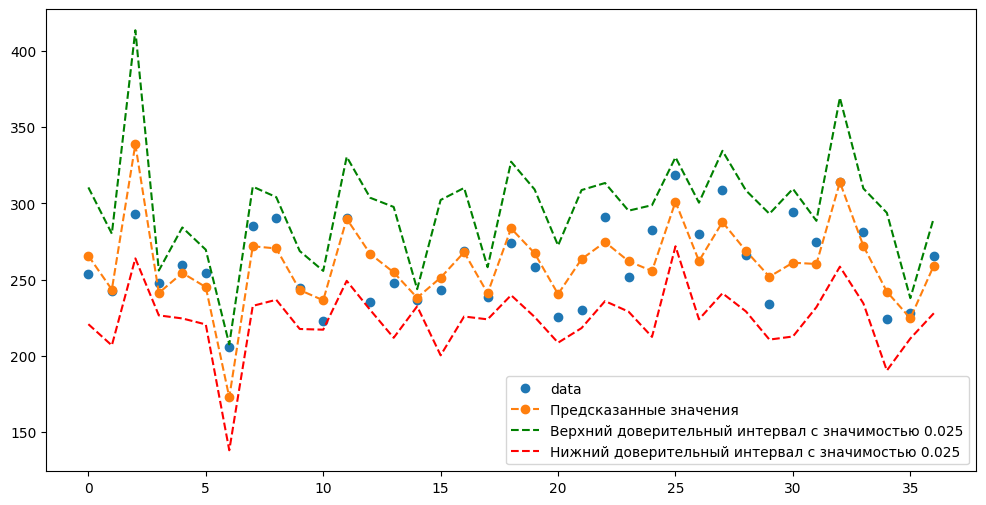

In [21]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

y_train.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)

pred_ols = fittedWLSModel.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]
predicted_mean = pred_ols.summary_frame()["mean"]

x = [i for i in range(y_train.size)]

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(y_train, "o", label="data")
ax.plot(x, predicted_mean, "o--", label="Предсказанные значения")
ax.plot(x, iv_u, "g--", label="Верхний доверительный интервал с значимостью 0.025")
ax.plot(x, iv_l, "r--", label="Нижний доверительный интервал с значимостью 0.025")
ax.legend(loc="best")

print("MSE metric:", mean_squared_error(y_train, predicted_mean))
print("R2 metric:", r2_score(y_train, predicted_mean))

In [22]:
het_test = het_white(fittedWLSModel.resid, fittedWLSModel.model.exog)
# Labels from docs
# Href 
labels = [
    'The lagrange multiplier statistic', 
    'The p-value of lagrange multiplier test', 
    'The f-statistic of the hypothesis that the error variance does not depend on x. This is an alternative test variant not the original LM test',
    'The p-value for the f-statistic'
]
"""
Overview
--------
White’s Lagrange Multiplier Test for Heteroscedasticity.
--------------------------------------------------------
alpha - statistical significance
p - The p-value of lagrange multiplier test
--------------------------------------------------------
H0: p > alpha -> None heteroscedasticity
H1: otherwise -> heteroscedasticity exists
--------------------------------------------------------
"""
display(dict(zip(labels, het_test)))

{'The lagrange multiplier statistic': 19.25029057895134,
 'The p-value of lagrange multiplier test': 0.023146863219617484,
 'The f-statistic of the hypothesis that the error variance does not depend on x. This is an alternative test variant not the original LM test': 3.2536235026118003,
 'The p-value for the f-statistic': 0.008355951809213898}

### МВНК график с предсказаниями и доверительными интервалами

MSE metric: 269.56440339965616
R2 metric: 0.444980620955824


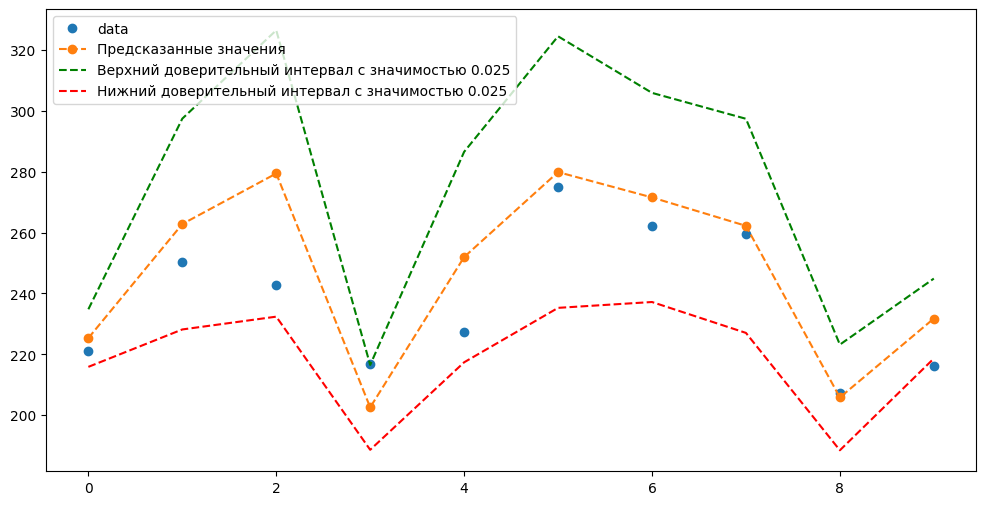

In [23]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

y_test.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
arr_for_resid = get_factors_by_linear_params(X_test)
weights = np.abs(fitted_resid_model.get_prediction(arr_for_resid).summary_frame()["mean"])

# weights


pred_ols = fittedWLSModel.get_prediction(X_test, weights=1./weights)
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]
predicted_mean = pred_ols.summary_frame()["mean"]

x = [i for i in range(y_test.size)]

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(y_test, "o", label="data")
ax.plot(x, predicted_mean, "o--", label="Предсказанные значения")
ax.plot(x, iv_u, "g--", label="Верхний доверительный интервал с значимостью 0.025")
ax.plot(x, iv_l, "r--", label="Нижний доверительный интервал с значимостью 0.025")
ax.legend(loc="best")

print("MSE metric:", mean_squared_error(y_test, predicted_mean))
print("R2 metric:", r2_score(y_test, predicted_mean))

### Тест Вайта

In [24]:
het_test = het_white(fittedWLSModel.resid, fittedWLSModel.model.exog)
# Labels from docs
# Href 
labels = [
    'The lagrange multiplier statistic', 
    'The p-value of lagrange multiplier test', 
    'The f-statistic of the hypothesis that the error variance does not depend on x. This is an alternative test variant not the original LM test',
    'The p-value for the f-statistic'
]
"""
Overview
--------
White’s Lagrange Multiplier Test for Heteroscedasticity.
--------------------------------------------------------
alpha - statistical significance
p - The p-value of lagrange multiplier test
--------------------------------------------------------
H0: p > alpha -> None heteroscedasticity
H1: otherwise -> heteroscedasticity exists
--------------------------------------------------------
Colnslusion
-----------
None heteroscedasticity with alpha = 0.05
"""
display(dict(zip(labels, het_test)))

{'The lagrange multiplier statistic': 19.25029057895134,
 'The p-value of lagrange multiplier test': 0.023146863219617484,
 'The f-statistic of the hypothesis that the error variance does not depend on x. This is an alternative test variant not the original LM test': 3.2536235026118003,
 'The p-value for the f-statistic': 0.008355951809213898}